# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df = pd.read_csv('C:\\Users\\justi\\OneDrive\\Desktop\\Project_ML\\dataset\\BitcoinHeistData.csv')

In [4]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [5]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2916697.0,2.014475e+03,2.257398e+00,2.011000e+03,2.013000e+03,2.014000e+03,2.016000e+03,2.018000e+03
day,2916697.0,1.814572e+02,1.040118e+02,1.000000e+00,9.200000e+01,1.810000e+02,2.710000e+02,3.650000e+02
length,2916697.0,4.500859e+01,5.898236e+01,0.000000e+00,2.000000e+00,8.000000e+00,1.080000e+02,1.440000e+02
weight,2916697.0,5.455192e-01,3.674255e+00,3.606469e-94,2.148438e-02,2.500000e-01,8.819482e-01,1.943749e+03
count,2916697.0,7.216446e+02,1.689676e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.600000e+01,1.449700e+04
looped,2916697.0,2.385067e+02,9.663217e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.449600e+04
neighbors,2916697.0,2.206516e+00,1.791877e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.292000e+04
income,2916697.0,4.464889e+09,1.626860e+11,3.000000e+07,7.428559e+07,1.999985e+08,9.940000e+08,4.996440e+13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [8]:
df.columns

Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'label'],
      dtype='object')

In [9]:
df = df.drop(columns=['address'])

In [10]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [11]:
df.head(5)

,year,day,length,weight,count,looped,neighbors,income,label
0,2017,11,18,0.008333,1,0,2,100050000.0,26
1,2016,132,44,0.000244,1,0,1,100000000.0,27
2,2016,246,0,1.000000,1,0,2,200000000.0,26
3,2016,322,72,0.003906,1,0,2,71200000.0,26
4,2016,238,144,0.072848,456,0,1,200000000.0,27


In [12]:
df['length'] = df['length'].replace(0, df['length'].median())
df['weight'] = df['weight'].replace(0, df['weight'].median())

In [13]:
df['income'] = np.log(df['income'] + 1) 

In [14]:
scaler = StandardScaler()

In [15]:
numerical_cols = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
df['income_per_day'] = df['income'] / df['day'] 

In [17]:
df.head(10)

,year,day,length,weight,count,looped,neighbors,income,label,income_per_day
0,2017,11,-0.502797,-0.146203,-0.426499,-0.246819,-0.011525,-0.621467,26,-0.056497
1,2016,132,-0.051269,-0.148404,-0.426499,-0.246819,-0.067333,-0.621747,27,-0.004710
2,2016,246,-0.676461,0.123693,-0.426499,-0.246819,-0.011525,-0.233857,26,-0.000951
3,2016,322,0.434990,-0.147408,-0.426499,-0.246819,-0.011525,-0.811833,26,-0.002521
4,2016,238,1.685373,-0.128644,-0.157216,-0.246819,-0.067333,-0.233857,27,-0.000983
5,2016,96,1.685373,-0.125442,1.242461,-0.246819,-0.067333,-1.009637,27,-0.010517
6,2016,225,1.650640,-0.147902,0.094311,-0.246819,-0.011525,-0.621747,26,-0.002763
7,2016,324,0.539189,-0.147408,-0.426499,-0.246819,-0.011525,-0.616234,26,-0.001902
8,2016,298,1.685373,0.478276,2.070430,-0.246819,-0.011525,-0.746620,26,-0.002505
9,2016,62,1.129647,-0.148471,-0.426499,-0.246819,-0.067333,-1.009637,27,-0.016284


In [18]:
df.shape

(2916697, 10)

In [19]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)


target_rows = 25000
num_classes = df['label'].nunique()
samples_per_class = max(1, target_rows // num_classes)

df_reduced = (
    df.groupby('label', group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), samples_per_class), random_state=42))
    .reset_index(drop=True)
)

selected_features = ['label'] + [col for col in df_reduced.columns if col != 'label'][:9]  
df_reduced = df_reduced[selected_features]

print("New dataset shape:", df_reduced.shape)
print("Class distribution:\n", df_reduced['label'].value_counts())

New dataset shape: (6613, 10)
Class distribution:
 label
28    862
23    862
27    862
3     862
4     862
26    862
14    483
7     354
6     251
17     62
5      55
11     55
12     34
10     32
19     28
15     13
0      11
25     10
9       9
22      8
21      7
2       7
18      7
8       6
13      4
24      2
16      1
1       1
20      1
Name: count, dtype: int64


In [20]:
df_reduced.shape

(6613, 10)

In [21]:
df_reduced.to_csv('Preprocessed_Bitcoinheist_ML.zip', index=False)

# Exploratory Data Analysis (EDA)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
sns.set(style="whitegrid")

In [25]:
df_viz =df_reduced.copy()

## Visualizing Categorical Features¶

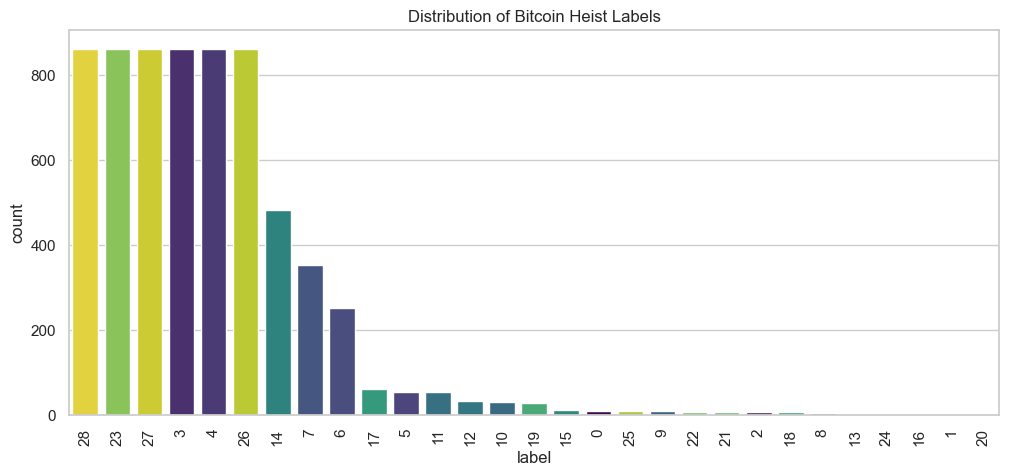

In [27]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_viz, x='label', hue='label', palette="viridis", order=df_viz['label'].value_counts().index, legend=False)
plt.xticks(rotation=90)
plt.title("Distribution of Bitcoin Heist Labels")
plt.show()

## Distribution Analysis of Numeric Features with Skewness

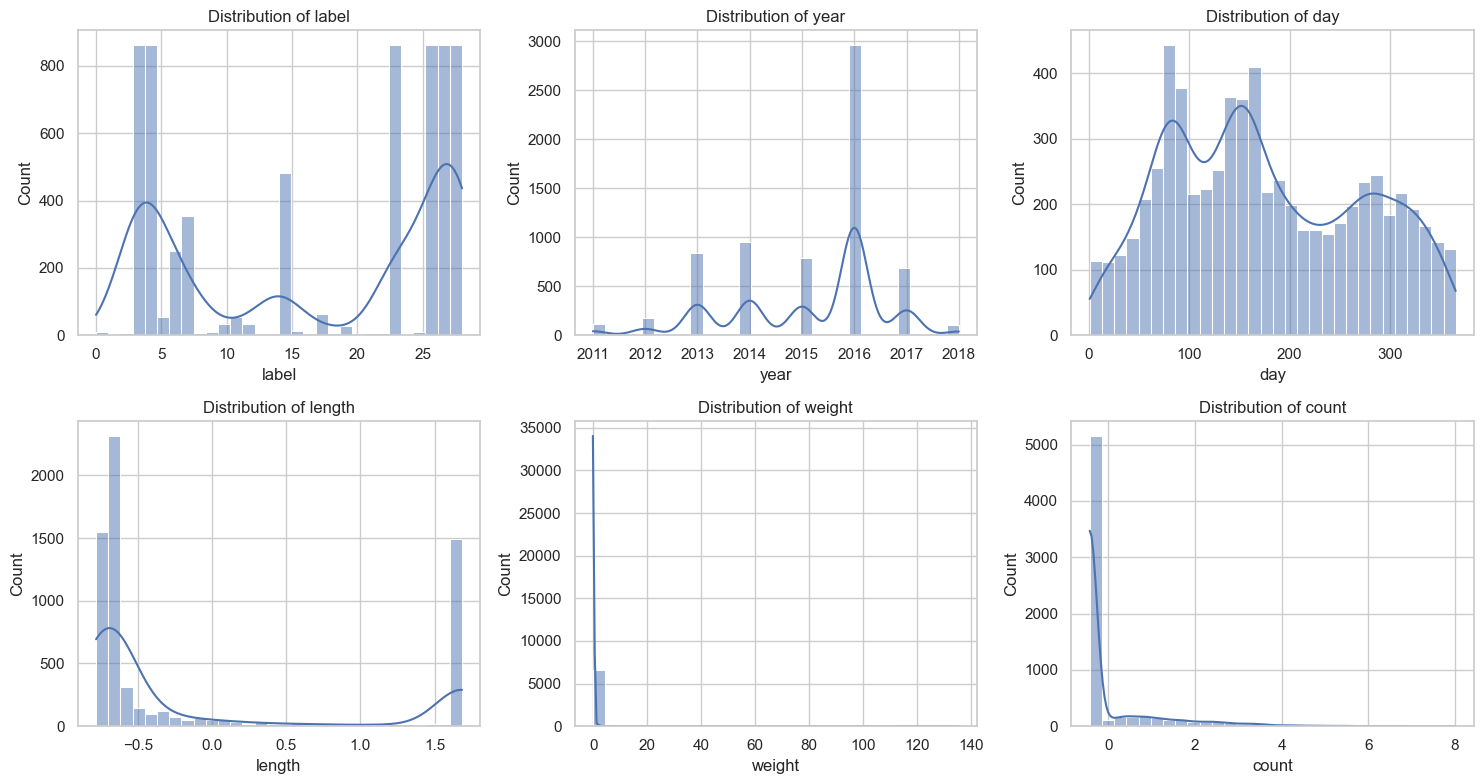

In [29]:
numeric_cols = df_viz.select_dtypes(include=['number']).columns
df_viz[numeric_cols].skew()

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:6]):  # First 6 features
    plt.subplot(2, 3, i+1)
    sns.histplot(df_viz[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


## Numerical Feature Visualization - Boxplots

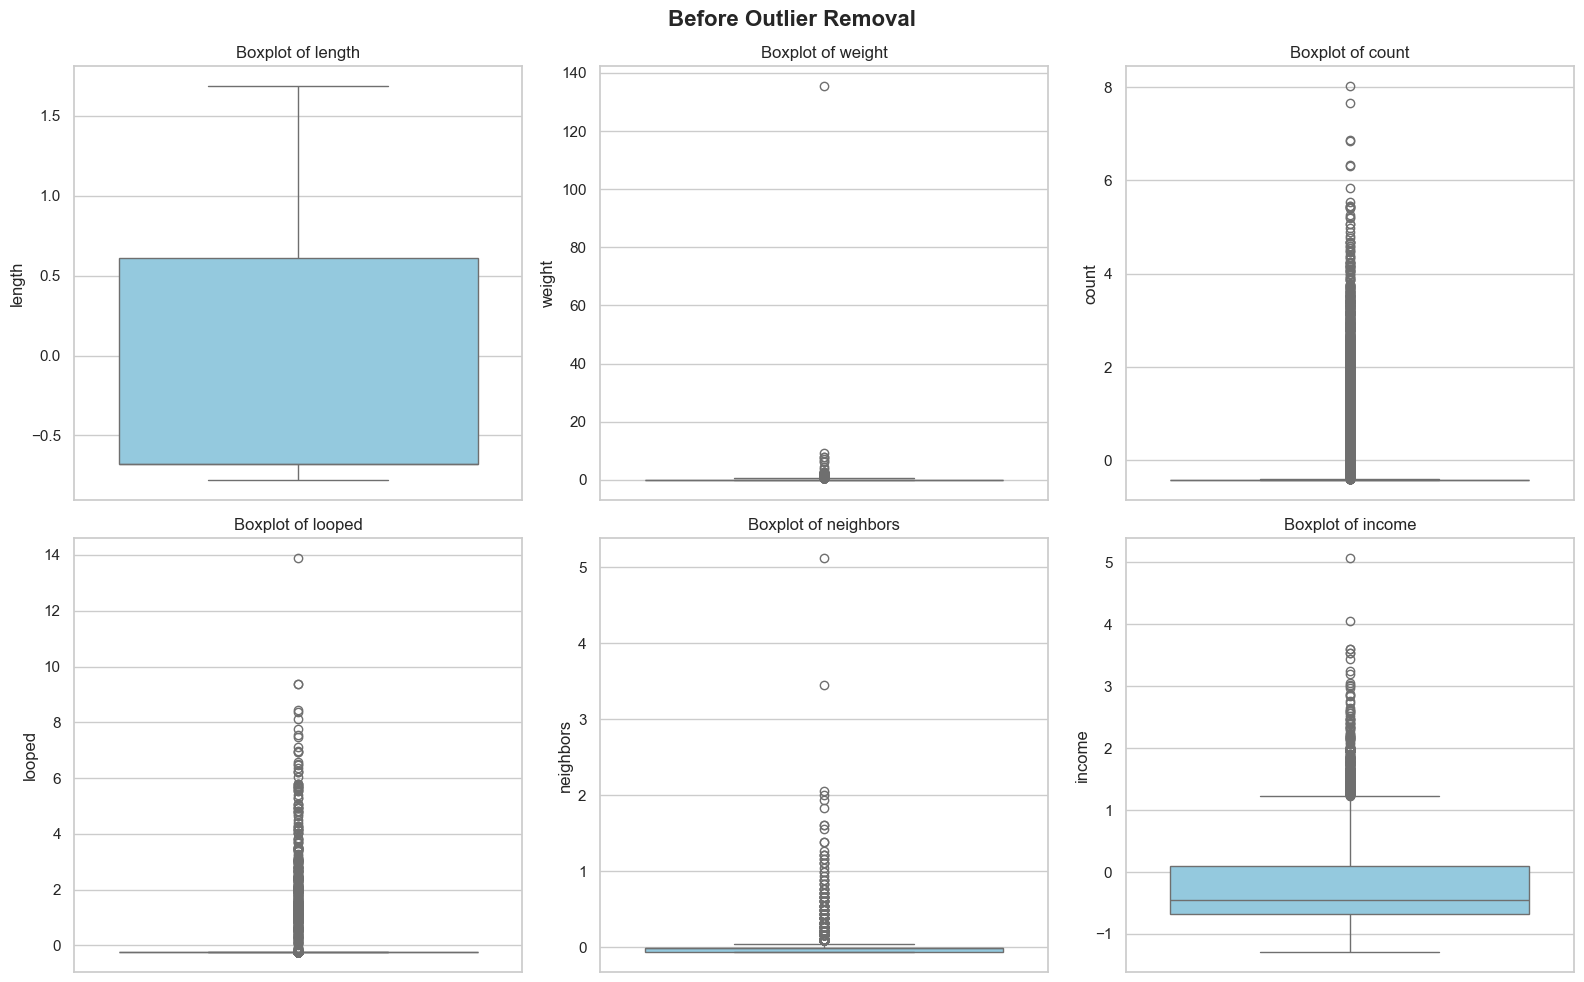

In [31]:
num_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Before Outlier Removal", fontsize=16, fontweight='bold')

for ax, feature in zip(axes.flatten(), num_features):
    sns.boxplot(y=df_viz[feature], ax=ax, color='skyblue')
    ax.set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

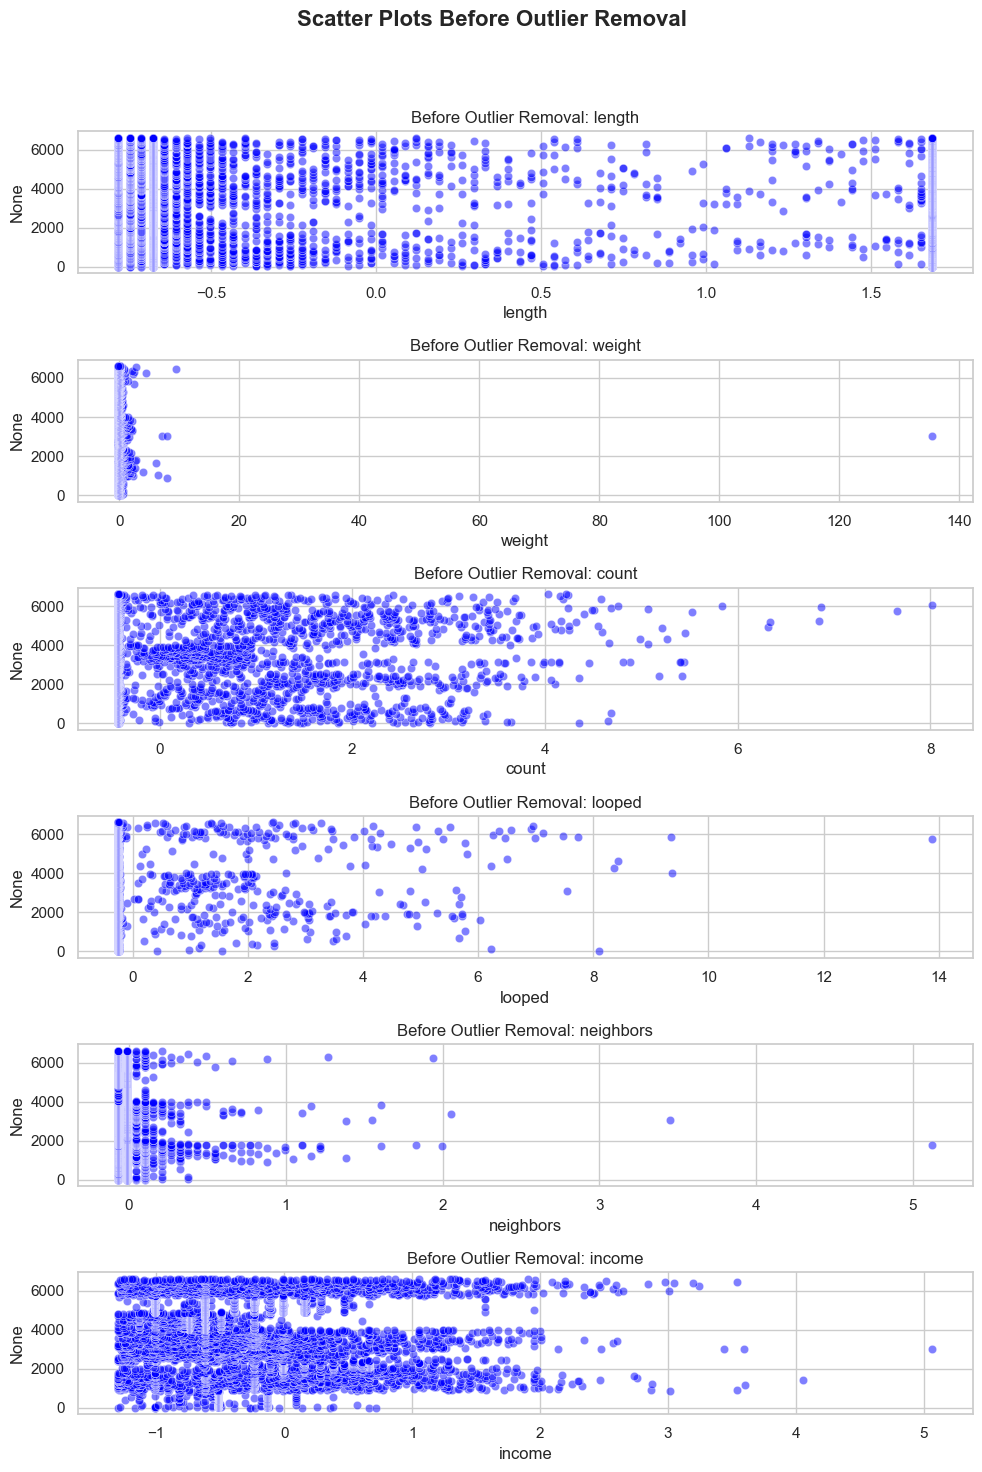

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 15))

fig.suptitle("Scatter Plots Before Outlier Removal", fontsize=16, fontweight='bold')

for i, feature in enumerate(num_features):
    sns.scatterplot(x=df_viz[feature], y=df_viz.index, ax=axes[i], color='blue', alpha=0.5)
    axes[i].set_title(f"Before Outlier Removal: {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Detecting Outliers Using the IQR Method 

In [34]:
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

print("\nOutliers in Each Feature (IQR Method):")
for feature in num_features:
    outliers = detect_outliers_iqr(df_viz, feature)
    print(f"{feature}: {len(outliers)} outliers")


Outliers in Each Feature (IQR Method):
length: 0 outliers
weight: 178 outliers
count: 1563 outliers
looped: 739 outliers
neighbors: 460 outliers
income: 296 outliers


## Outlier Detection and Removal - IQR Method

In [36]:
import numpy as np
import pandas as pd
from scipy import stats

def handle_outliers(df, columns, method="cap"):
    df_processed = df.copy()
    
    for col in columns:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == "remove":
            df_processed = df_processed.loc[(df_processed[col] >= lower_bound) & (df_processed[col] <= upper_bound)]
        
        elif method == "cap":
            df_processed[col] = df_processed[col].clip(lower_bound, upper_bound)
        
        elif method == "log":
            df_processed[col] = np.log1p(df_processed[col])
    
    return df_processed
df_viz_cleaned = handle_outliers(df_viz, num_features, method="cap")


In [37]:
print("Dataset Overview:")
print(df_viz_cleaned.info())
print(df_viz_cleaned.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6613 entries, 0 to 6612
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   label           6613 non-null   int32  
 1   year            6613 non-null   int64  
 2   day             6613 non-null   int64  
 3   length          6613 non-null   float64
 4   weight          6613 non-null   float64
 5   count           6613 non-null   float64
 6   looped          6613 non-null   float64
 7   neighbors       6613 non-null   float64
 8   income          6613 non-null   float64
 9   income_per_day  6613 non-null   float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 490.9 KB
None
             label         year          day       length       weight  \
count  6613.000000  6613.000000  6613.000000  6613.000000  6613.000000   
mean     16.754272  2015.158325   175.667171    -0.053108    -0.005336   
std      10.255284     1.459746    94.843419  

## Numerical Feature Visualization - Boxplots After Outlier Handling

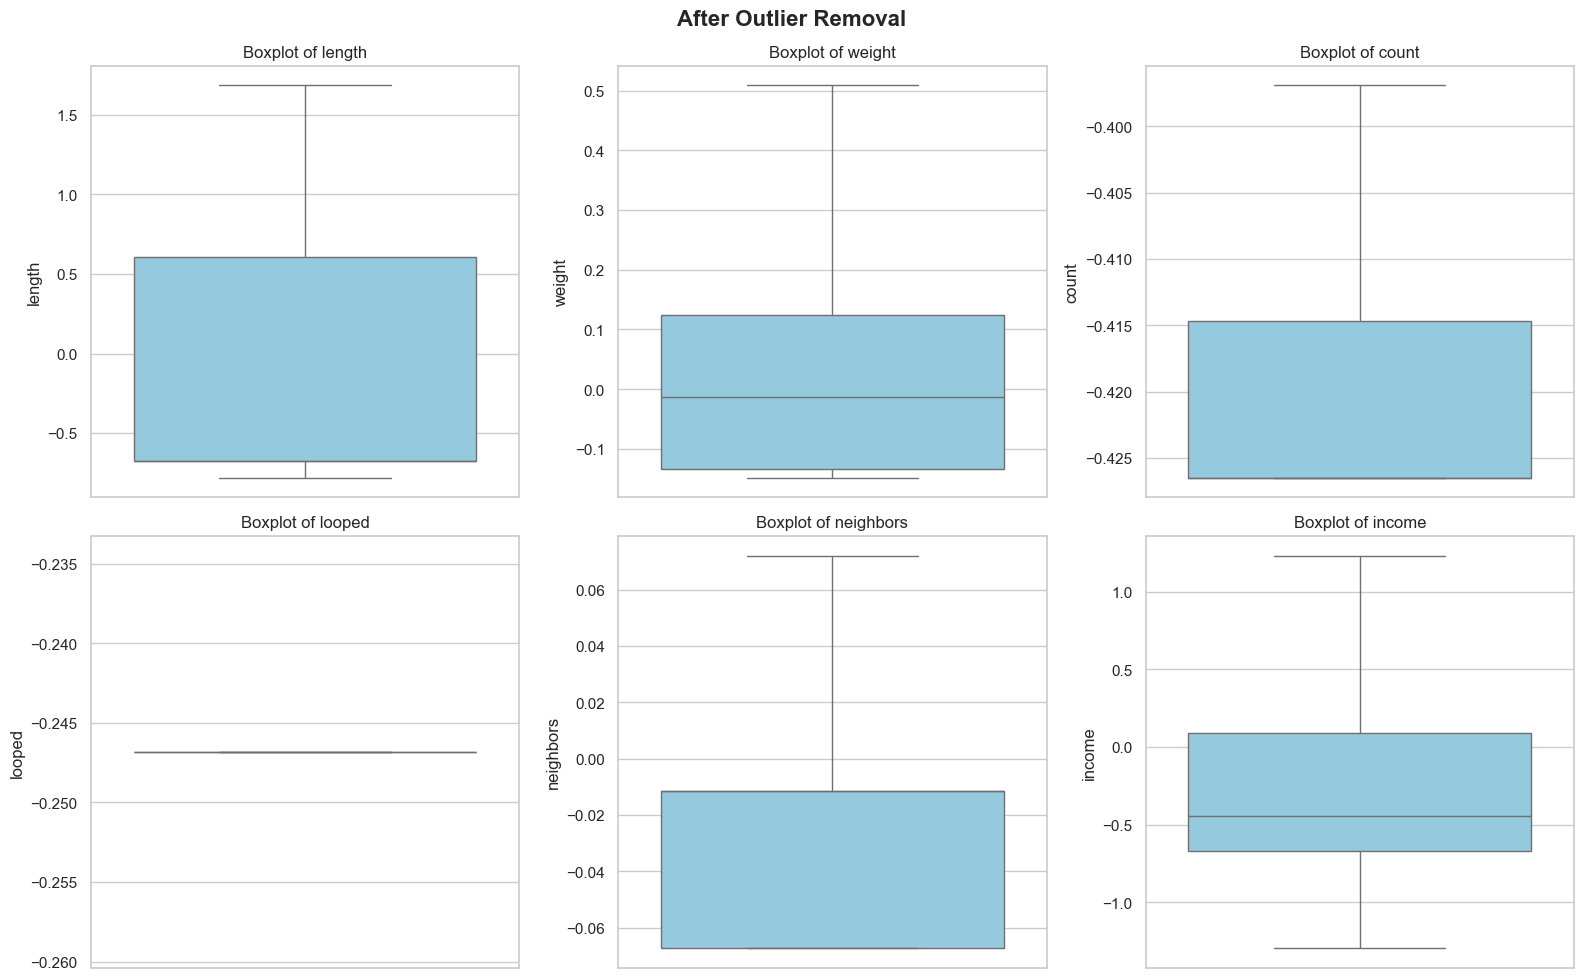

In [39]:
num_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("After Outlier Removal", fontsize=16, fontweight='bold')

for ax, feature in zip(axes.flatten(), num_features):
    sns.boxplot(y=df_viz_cleaned[feature], ax=ax, color='skyblue')
    ax.set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()



## Numerical Feature Distribution - Histograms After Outlier Handling

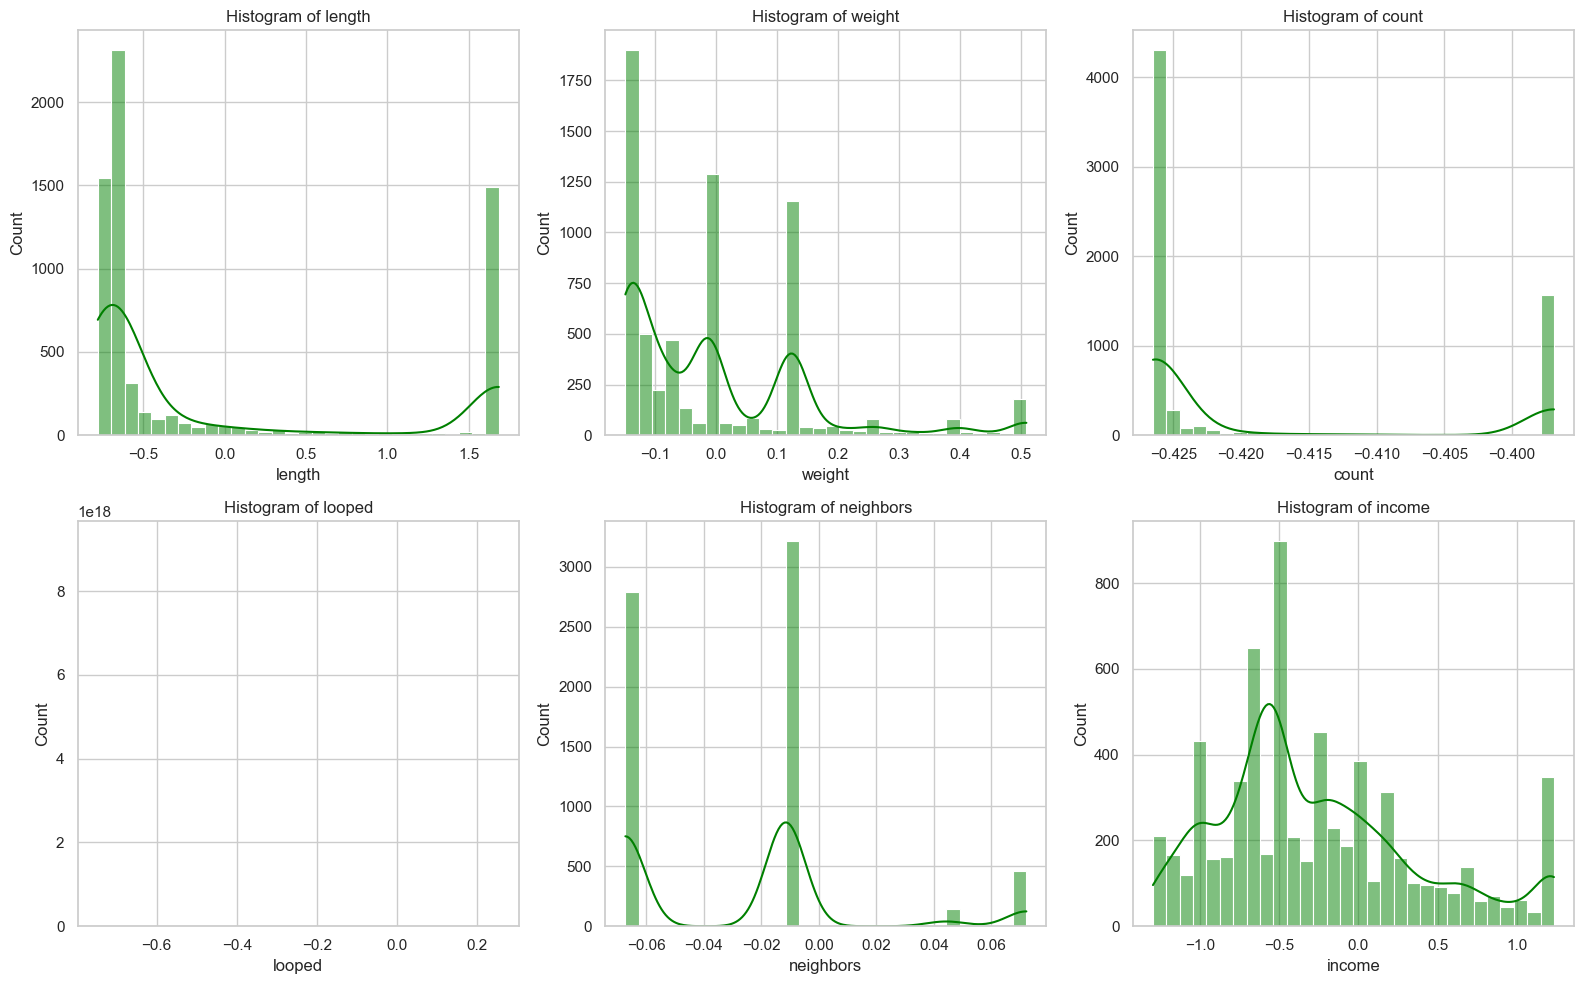

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for ax, feature in zip(axes.flatten(), num_features):
    sns.histplot(df_viz_cleaned[feature], bins=30, kde=True, ax=ax, color='green')
    ax.set_title(f"Histogram of {feature}")

plt.tight_layout()
plt.show()


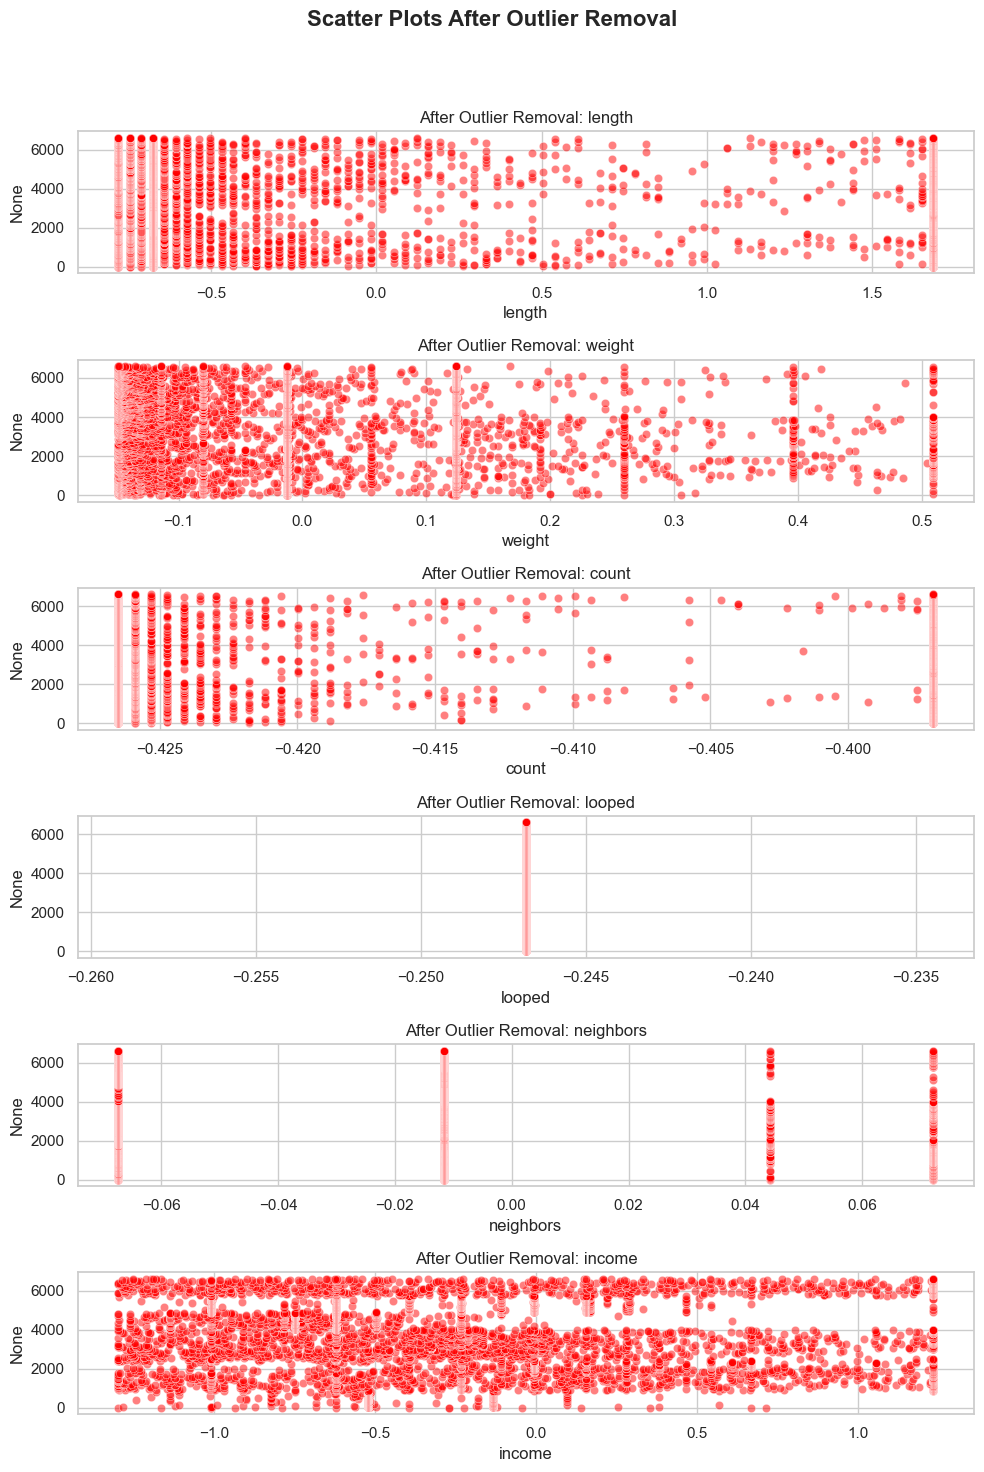

In [42]:
num_features = ['length', 'weight', 'count', 'looped', 'neighbors', 'income']
fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 15))
fig.suptitle("Scatter Plots After Outlier Removal", fontsize=16, fontweight='bold')

for i, feature in enumerate(num_features):
    sns.scatterplot(x=df_viz_cleaned[feature], y=df_viz_cleaned.index, ax=axes[i], color='red', alpha=0.5)
    axes[i].set_title(f"After Outlier Removal: {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [43]:
print("\nSkewness of Features:")
print(df_viz_cleaned[num_features].skew())


Skewness of Features:
length       1.069753
weight       1.475513
count        1.157113
looped       0.000000
neighbors    0.857125
income       0.733522
dtype: float64


## Violin Plots of Features

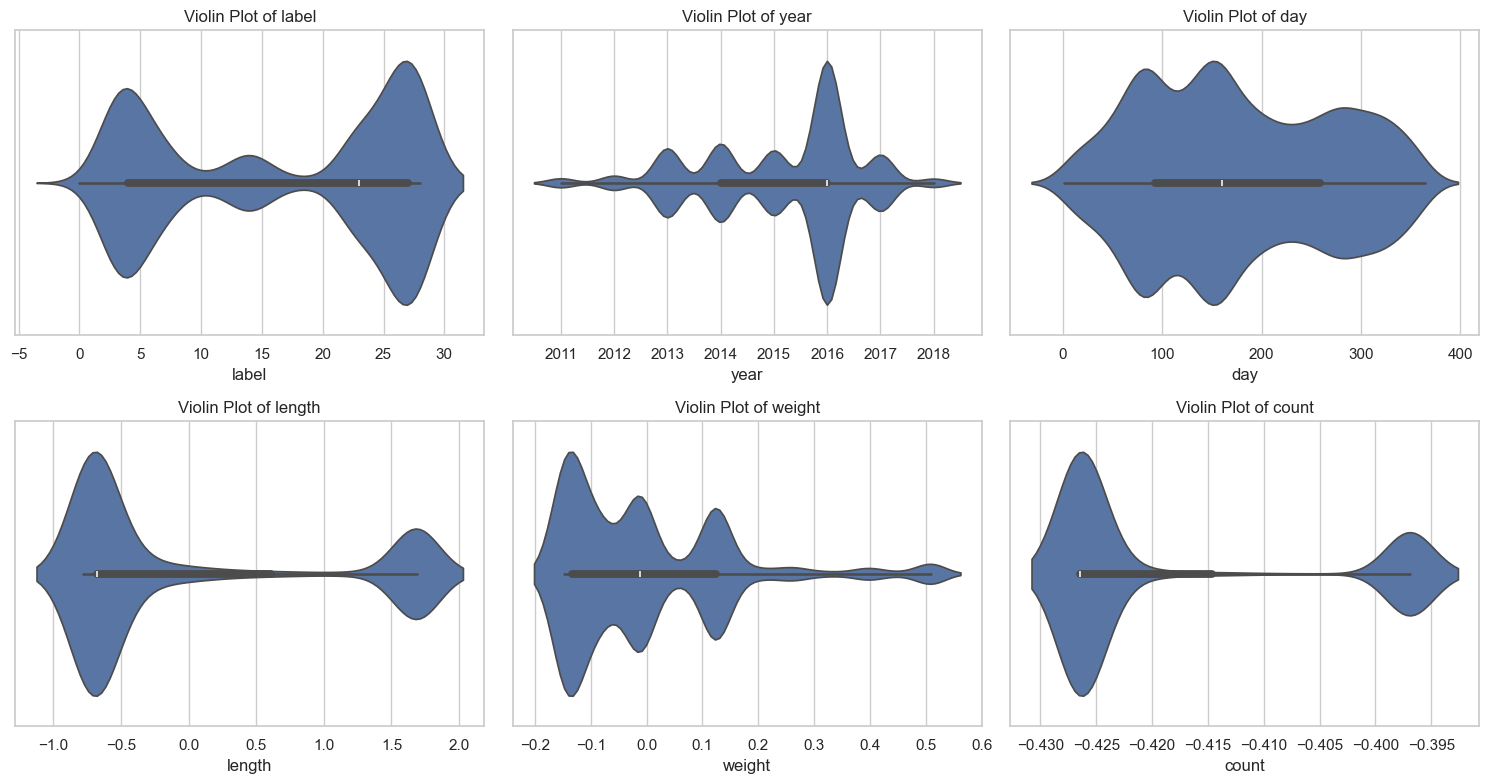

In [46]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:6]):  
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=df_viz_cleaned[col])
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()


## Correlation Heatmap

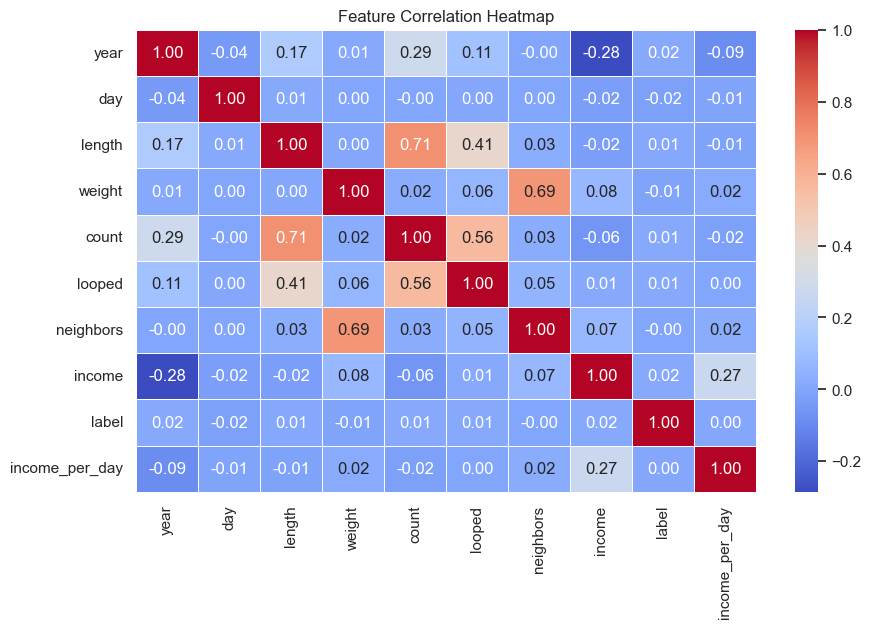

In [48]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Pairplot Visualization of Numeric Features 

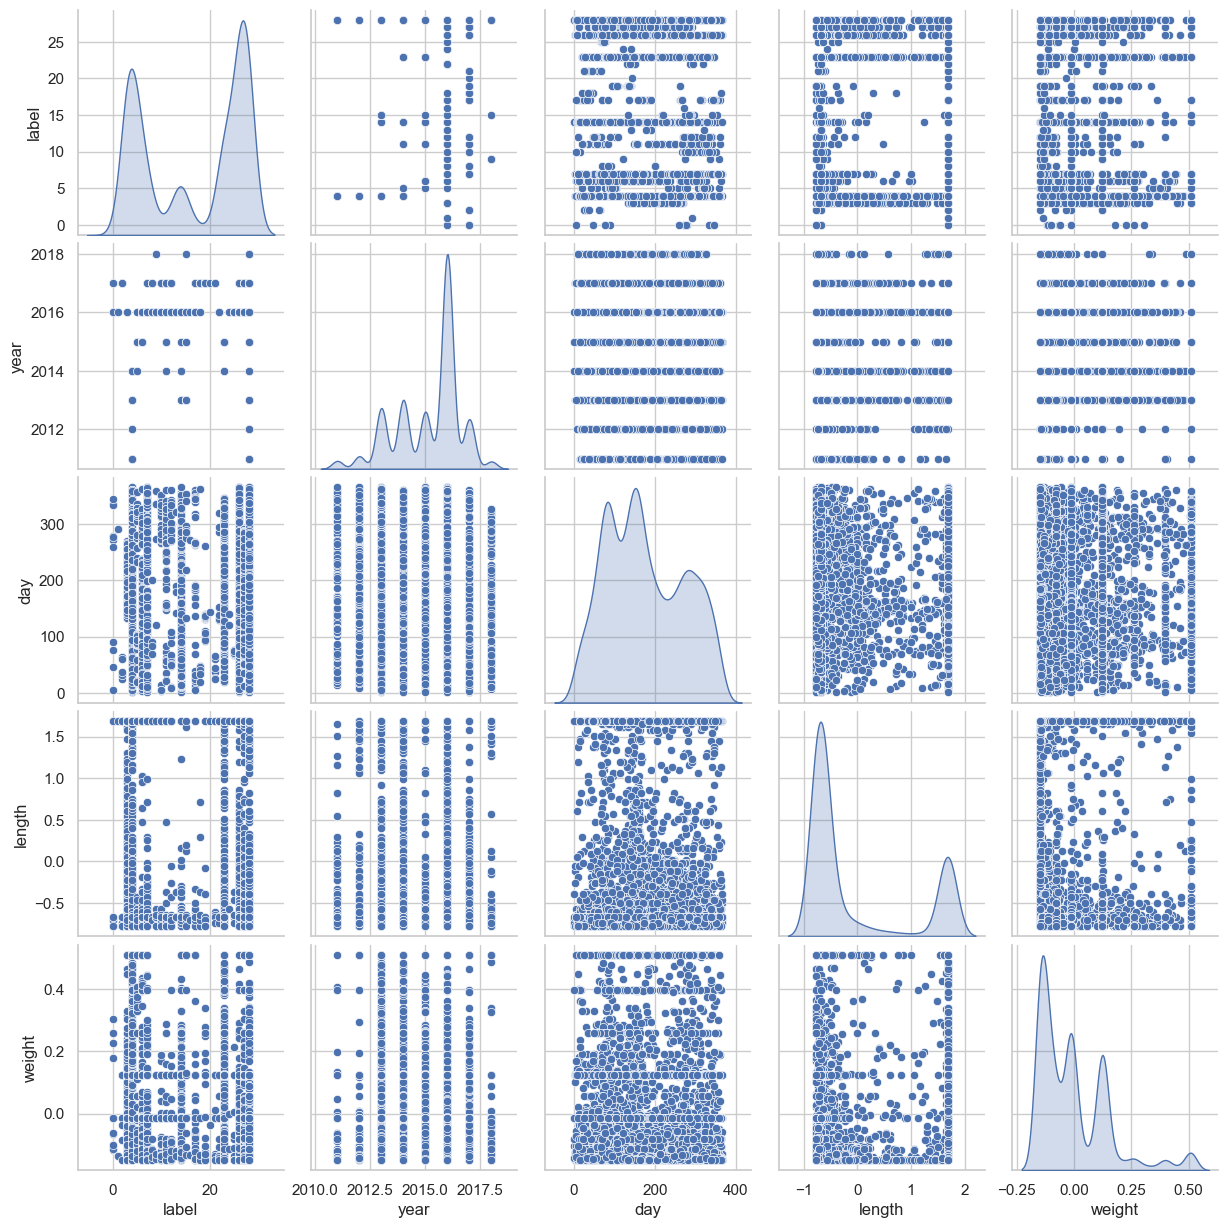

In [50]:
sns.pairplot(df_viz_cleaned[numeric_cols[:5]], diag_kind='kde')
plt.show()


## Distribution of Income

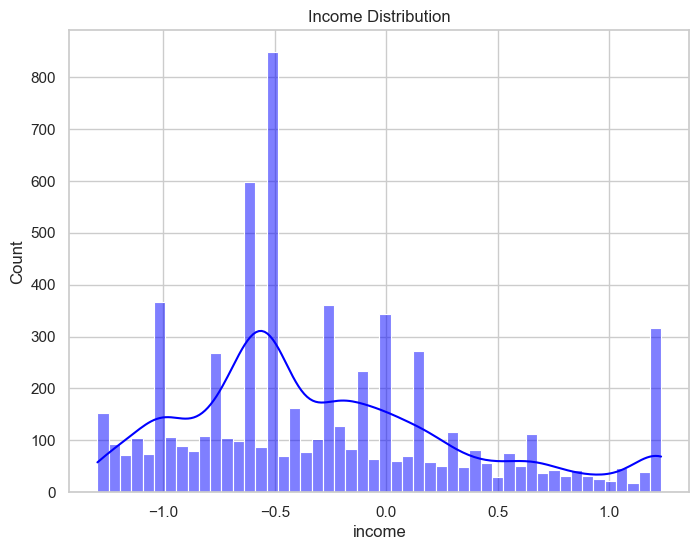

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(df_viz_cleaned['income'], bins=50, kde=True, color="blue")
plt.title("Income Distribution")
plt.show()

In [53]:
print("Unique Labels in Dataset:", np.unique(df_viz['label']))

Unique Labels in Dataset: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


In [54]:
original_labels = label_encoder.inverse_transform(np.unique(df['label']))
print("Decoded Labels:", original_labels)

Decoded Labels: ['montrealAPT' 'montrealComradeCircle' 'montrealCryptConsole'
 'montrealCryptXXX' 'montrealCryptoLocker' 'montrealCryptoTorLocker2015'
 'montrealDMALocker' 'montrealDMALockerv3' 'montrealEDA2' 'montrealFlyper'
 'montrealGlobe' 'montrealGlobeImposter' 'montrealGlobev3'
 'montrealJigSaw' 'montrealNoobCrypt' 'montrealRazy' 'montrealSam'
 'montrealSamSam' 'montrealVenusLocker' 'montrealWannaCry'
 'montrealXLocker' 'montrealXLockerv5.0' 'montrealXTPLocker'
 'paduaCryptoWall' 'paduaJigsaw' 'paduaKeRanger' 'princetonCerber'
 'princetonLocky' 'white']


# Train-Test Split & Model Training

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df_viz_cleaned.drop(columns=['label'])
y = df_viz_cleaned['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
print(f"Train Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Train Set Shape: (5290, 9)
Test Set Shape: (1323, 9)


## Model Comparison & Selection

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
models = {
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=10000, random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, random_state=42)
}
results = {}

for model_name, model in models.items():
    if model_name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    print(f"{model_name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.5745
Random Forest Classifier Accuracy: 0.8148
SVM Accuracy: 0.7037
Gradient Boosting Classifier Accuracy: 0.7959


In [63]:
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Best Model: Random Forest Classifier with Accuracy: 0.8148


## Fine-Tuning the Best Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=25,
    min_samples_leaf=10,
    min_samples_split=10,

    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Fine-Tuned Model Accuracy: {accuracy:.4f}")

Fine-Tuned Model Accuracy: 0.7581


# Model Evaluation

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

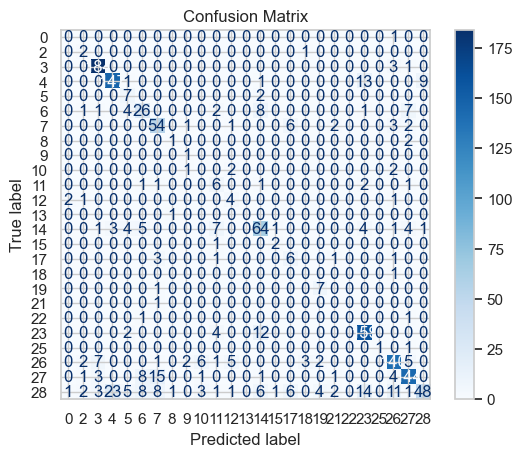

In [71]:
cm = confusion_matrix(y_test, y_pred)

display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test)) 
display_cm.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Feature Importance

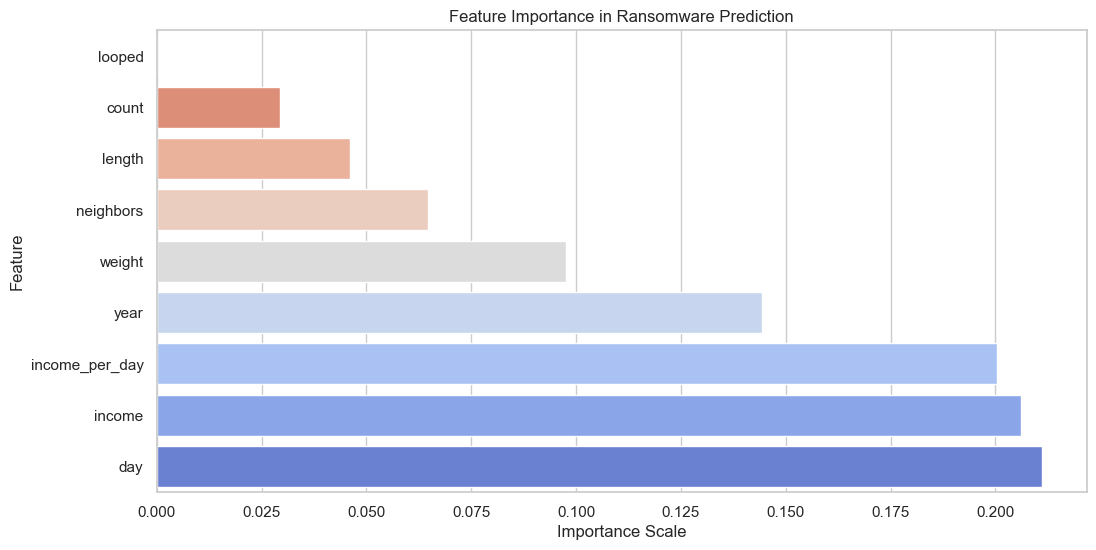

In [74]:
feature_imp = rf.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_imp})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=feature_df['Feature'], x=feature_df['Importance'], hue=feature_df['Feature'], palette="coolwarm", legend=False)
plt.title("Feature Importance in Ransomware Prediction")
plt.xlabel("Importance Scale")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


# Testing Model with Sample Inputs

In [80]:
sample_test = X_test.iloc[[0]]
prediction = rf.predict(sample_test)

predicted_label = label_encoder.inverse_transform(prediction)[0]
print(f"\nModel Prediction for Sample Test: {predicted_label}")



Model Prediction for Sample Test: princetonCerber
